torch.Size([1, 3, 224, 224])
torch.Size([1, 1000])


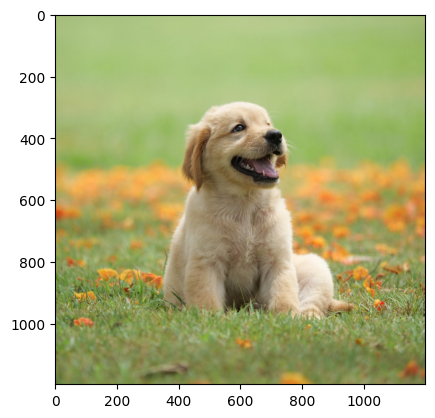

Predicted class: 207


In [3]:
import torch
from torchvision import transforms
from PIL import Image
import timm
import matplotlib.pyplot as plt

from torchvision import datasets




image_path = 'dog.jpg'


preprocess = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), 
])


image = Image.open(image_path).convert('RGB')
input_data = preprocess(image).unsqueeze(0)  
print(input_data.shape)

model_vim = timm.create_model('vit_base_patch16_224', pretrained=True)



model_vim.eval()


with torch.no_grad():
    output = model_vim(input_data)

print(output.shape)
_, predicted_class = output.max(1)

plt.imshow(image)
plt.show()
print("Predicted class:", predicted_class.item())


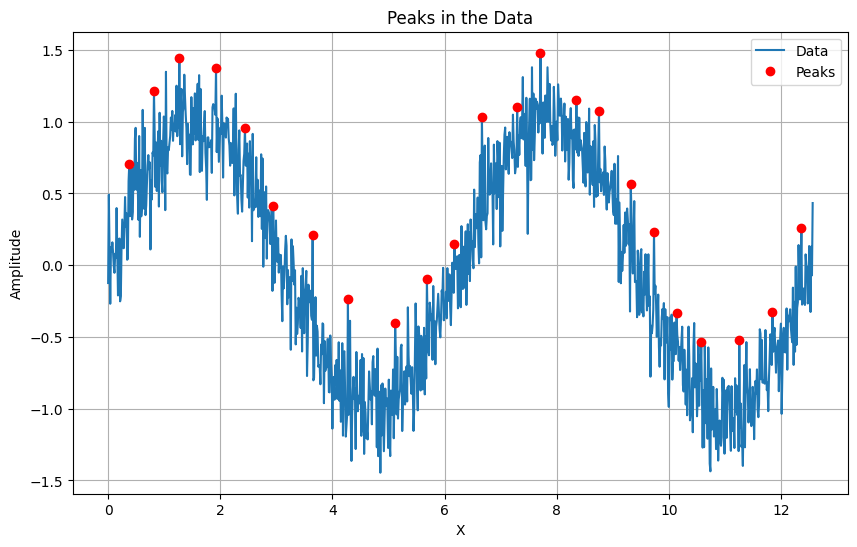

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from peakutils import indexes

# Create a sample dataset
x = np.linspace(0, 4*np.pi, 1000)
data = np.sin(x) + np.random.randn(len(x)) * 0.2

# Find peaks in the dataset using peakutils
peak_indices = indexes(data, thres=0.3, min_dist=30)

# Plot the dataset and highlight the peaks
plt.figure(figsize=(10, 6))
plt.plot(x, data, label='Data')
plt.plot(x[peak_indices], data[peak_indices], 'ro', label='Peaks')
plt.xlabel('X')
plt.ylabel('Amplitude')
plt.title('Peaks in the Data')
plt.legend()
plt.grid(True)
plt.show()
